In [1]:
# Jupyter 环境：不要使用 Agg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 中文字体设置（Windows 推荐）
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 可视化风格
sns.set(style="whitegrid", font="Microsoft YaHei")


In [2]:
# 原始数据路径
data_path = r'D:\项目\肺癌预测系统后端\data\raw\cancer patient data sets.csv'

df = pd.read_csv(data_path)

print("原始数据形状:", df.shape)
df.head()


原始数据形状: (1000, 26)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# 删除无用列
df = df.drop(columns=['index', 'Patient Id'], errors='ignore')

print("清洗后数据形状:", df.shape)
df.head()



清洗后数据形状: (1000, 24)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
# 统一字符串格式
df['Level'] = df['Level'].str.strip().str.capitalize()

# 映射为数字标签
level_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['Level'] = df['Level'].map(level_map)

# 检查
df['Level'].value_counts().sort_index()


Level
0    303
1    332
2    365
Name: count, dtype: int64

In [6]:
print("是否存在缺失值：")
print(df.isnull().sum().head())

print("\n数据类型：")
df.dtypes


是否存在缺失值：
Age              0
Gender           0
Air Pollution    0
Alcohol use      0
Dust Allergy     0
dtype: int64

数据类型：


Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

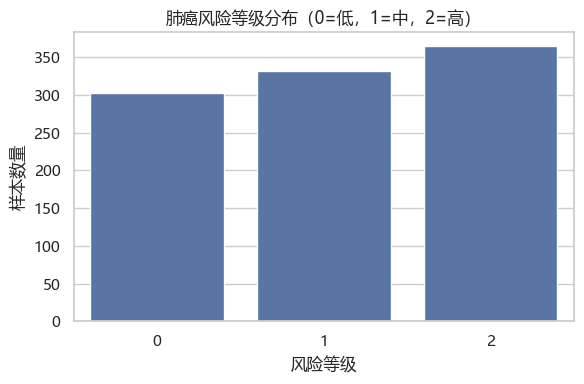

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='Level', data=df)
plt.title('肺癌风险等级分布（0=低，1=中，2=高）')
plt.xlabel('风险等级')
plt.ylabel('样本数量')
plt.tight_layout()
plt.show()


In [8]:
feature_cols = df.drop(columns=['Level']).columns

group_mean = df.groupby('Level')[feature_cols].mean()
group_mean


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Level,,,,,,,,,,,,,,,,,,,,,
0,35.412541,1.508251,2.600660,2.231023,3.112211,3.000000,2.732673,3.092409,3.000000,2.409241,...,2.861386,2.171617,2.501650,2.498350,2.574257,2.759076,2.468647,2.366337,2.914191,2.141914
1,38.620482,1.406627,2.933735,4.198795,5.442771,4.716867,4.292169,3.963855,3.512048,3.903614,...,3.846386,3.487952,4.415663,4.632530,4.756024,4.159639,4.936747,3.674699,3.695783,3.310241
2,37.320548,1.309589,5.693151,6.830137,6.616438,6.479452,6.375342,5.827397,6.619178,6.682192,...,7.438356,5.589041,4.468493,5.328767,3.884932,4.189041,4.208219,4.380822,4.775342,3.227397


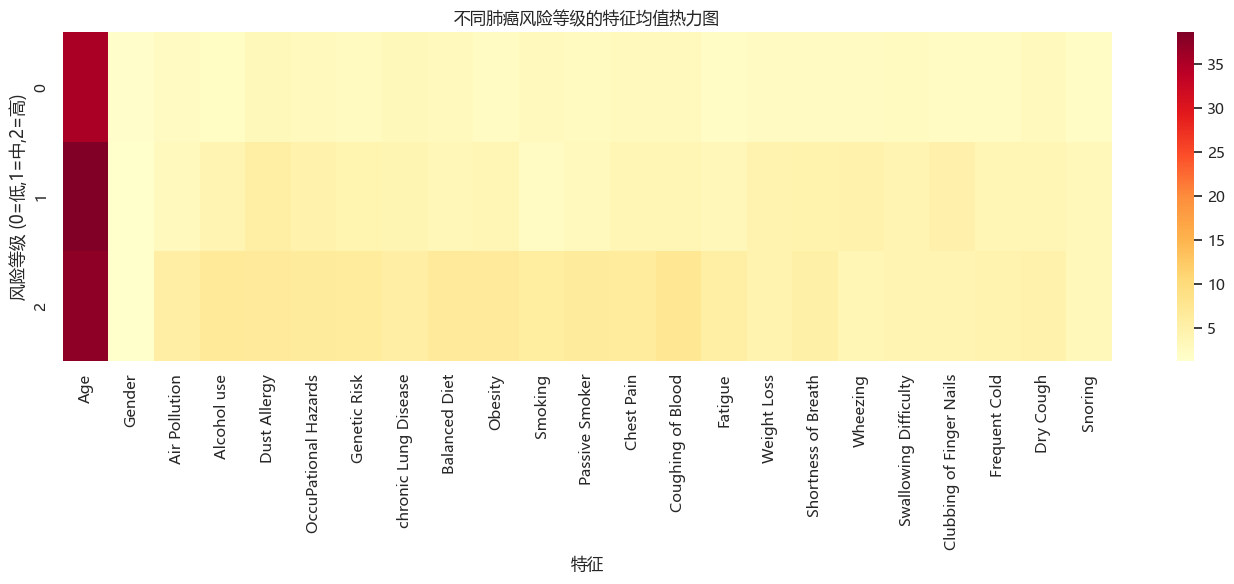

In [9]:
plt.figure(figsize=(14,6))
sns.heatmap(group_mean, cmap='YlOrRd', annot=False)
plt.title('不同肺癌风险等级的特征均值热力图')
plt.xlabel('特征')
plt.ylabel('风险等级 (0=低,1=中,2=高)')
plt.tight_layout()
plt.show()


In [11]:
save_path = r'D:\项目\肺癌预测系统后端\data\processed\lung_cancer_processed.csv'
df.to_csv(save_path, index=False, encoding='utf-8-sig')

print("✅ 处理后的数据已保存到:", save_path)


✅ 处理后的数据已保存到: D:\项目\肺癌预测系统后端\data\processed\lung_cancer_processed.csv
